In [1]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4)
client = Client(cluster)
client



Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/44856/1,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/44856/4,Total threads: 4
Dashboard: http://137.129.155.67:34967/status,Memory: 78.61 GiB
Nanny: None,


In [4]:
indir_data_RAW = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/'
ds_RAW = xr.open_mfdataset(indir_data_RAW + 'OLR/anom_OLR_brut_ERA5_3H_*.nc', chunks = {'time' : 1})
ds_RAW = ds_RAW.sel(lat = slice(-15,15))
ds_RAW = ds_RAW.isel(time = slice(0,None,4))
da_RAW = ds_RAW['OLR_ano']

indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/FILTERED_ANOMALY/'
ds_FILTER = xr.open_mfdataset(indir_data_FILTERED + 'OLR/*.nc', chunks = {'time' : 1})
ds_FILTER = ds_FILTER.sel(lat = slice(-15,15))
ds_FILTER = ds_FILTER.isel(time = slice(0,None,4))
ds_FILTER

var = ['OLR_Kelvin','OLR_Rossby','OLR_MJO','OLR_MRG','OLR_EIG','OLR_WIG','OLR_TD']

In [5]:
ds_FILTER['OLR_ano'] = da_RAW

In [6]:
ds_FILTER = ds_FILTER.astype('float16').copy()

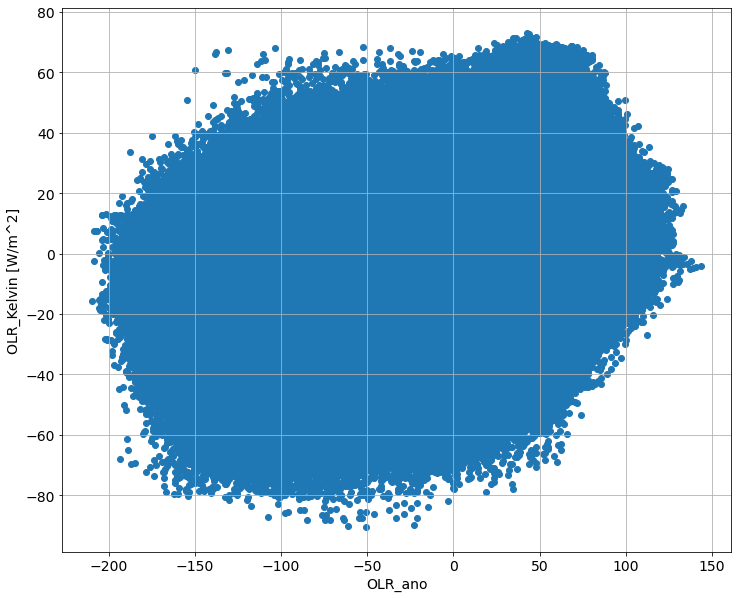

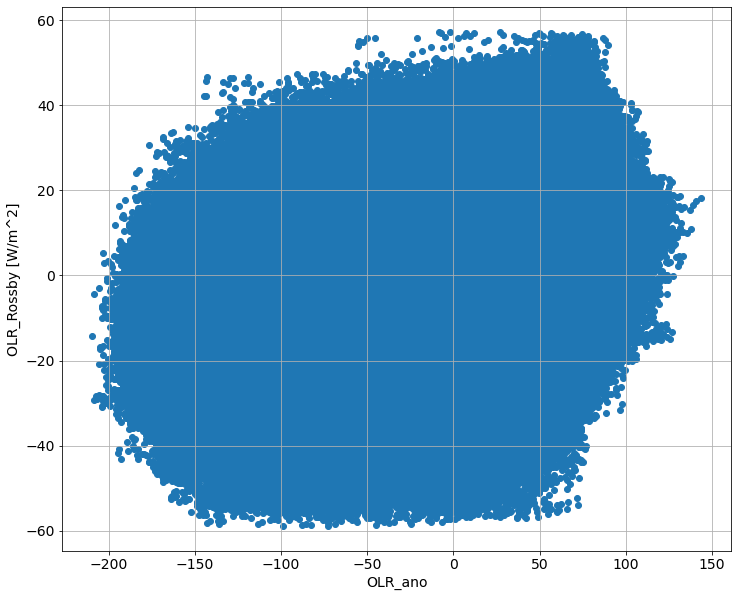

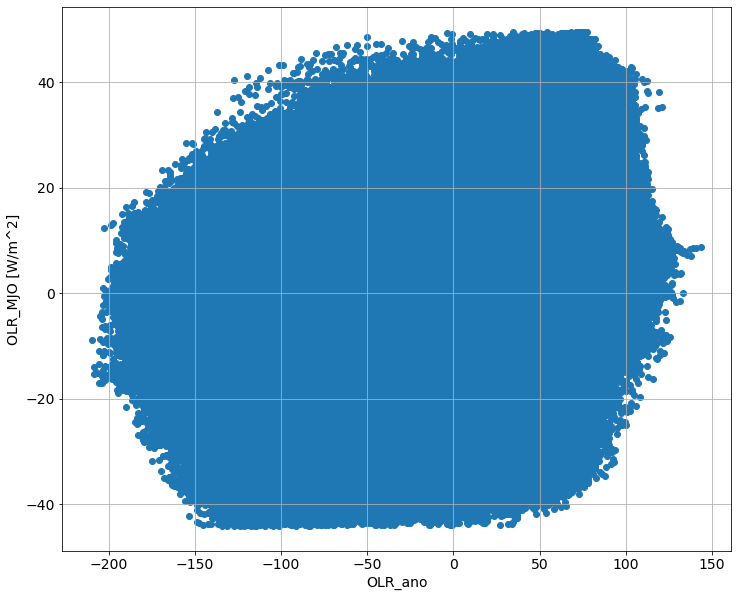

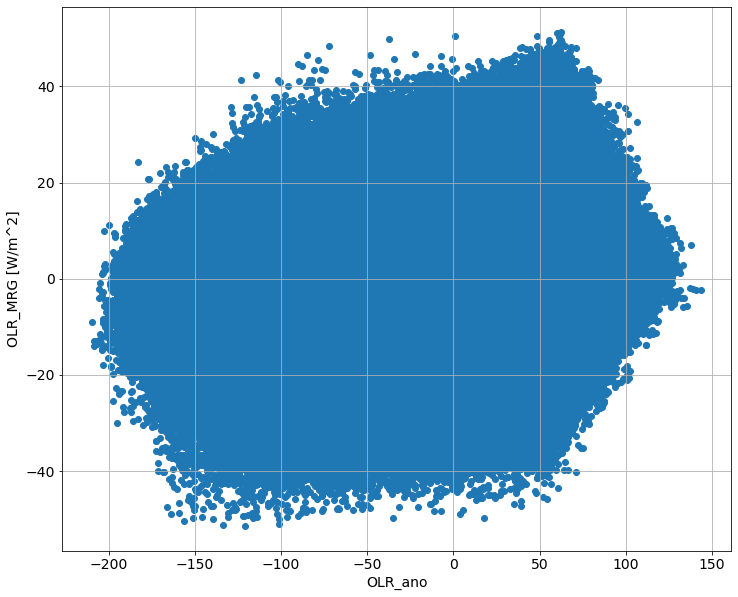

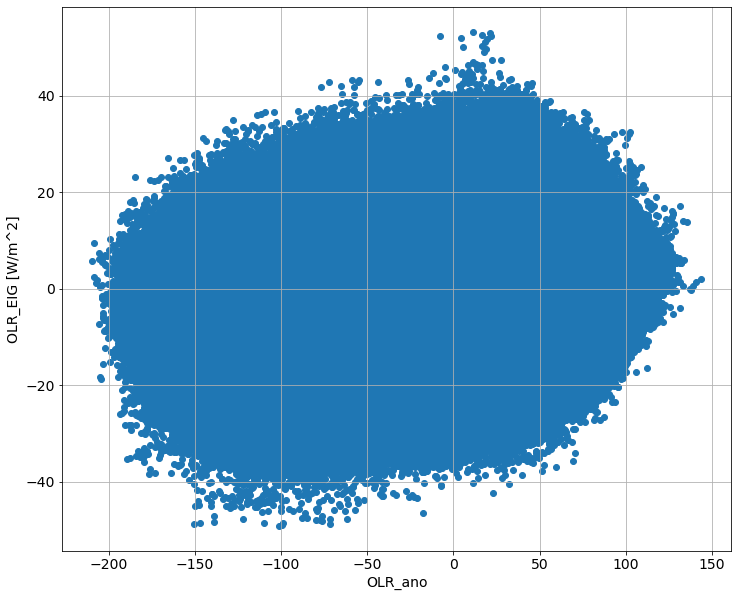

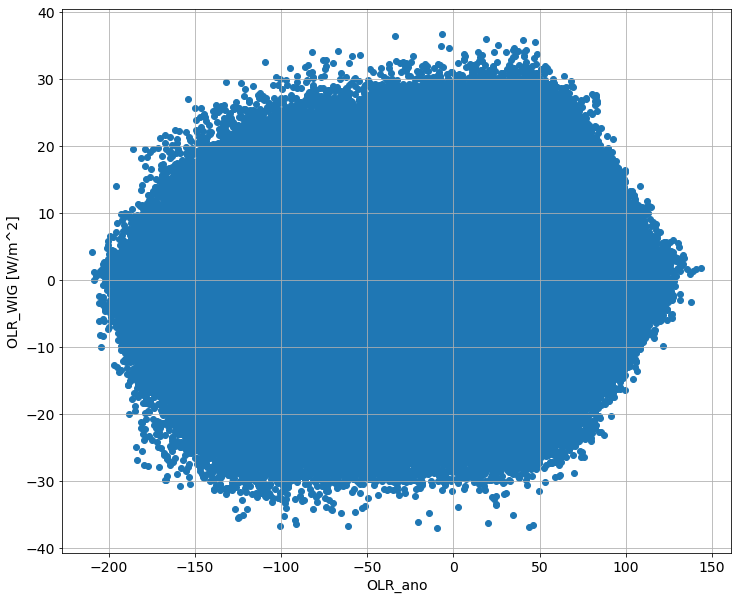

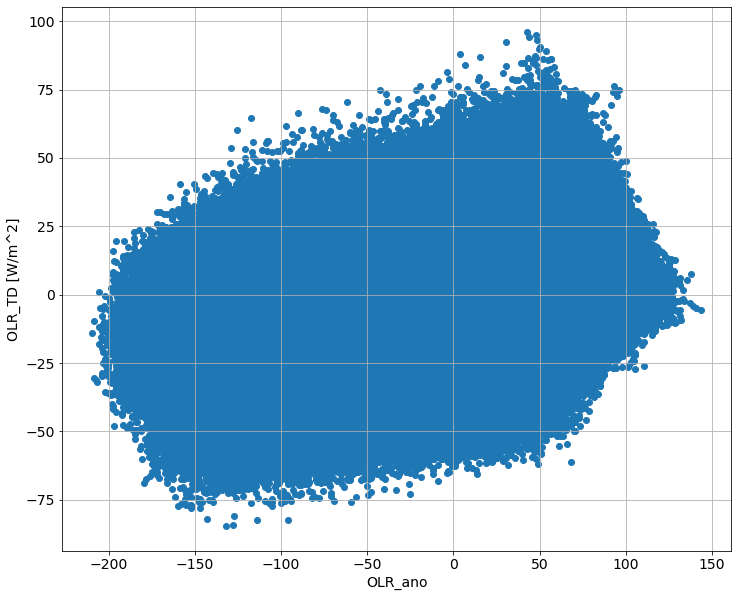

In [7]:
plt.rc("figure", figsize=(12,10))
for v in var :
    ds_FILTER.plot.scatter(x = 'OLR_ano', y = v)
    plt.grid()
    plt.show()

In [9]:
_ds_FILTER = ds_FILTER.sel(lat = slice(4,10), lon = slice(180,220))

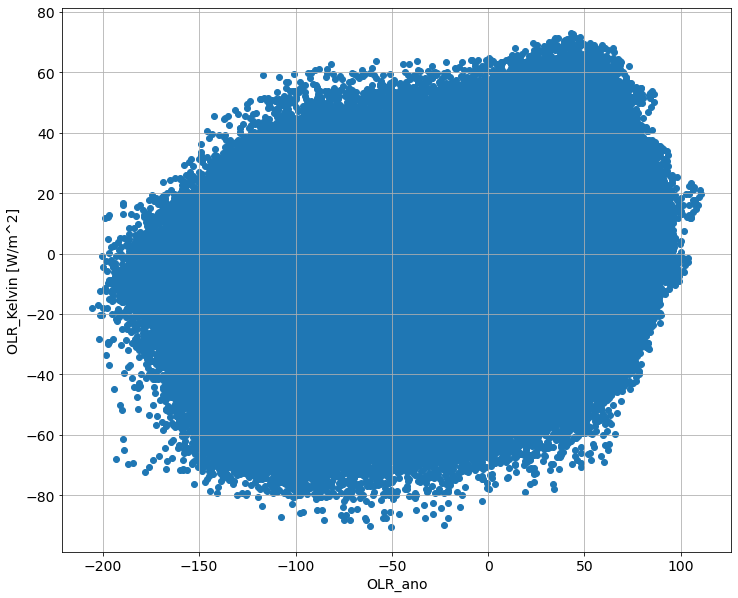

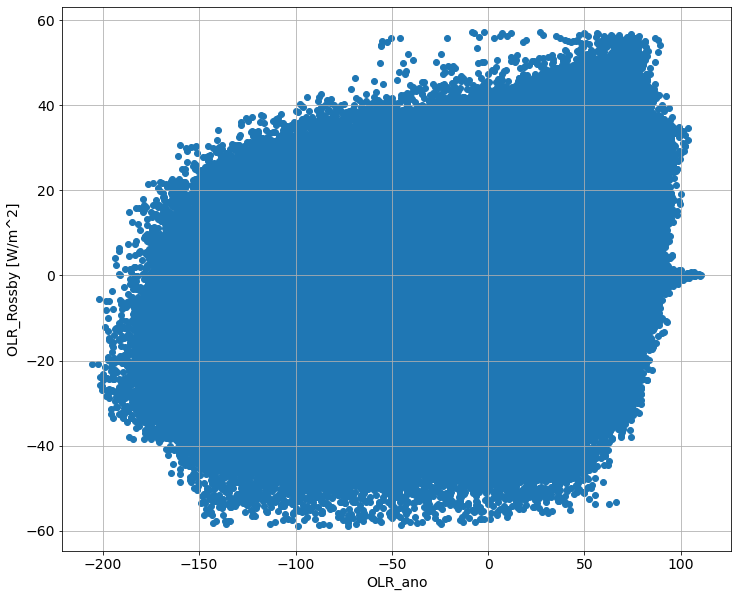

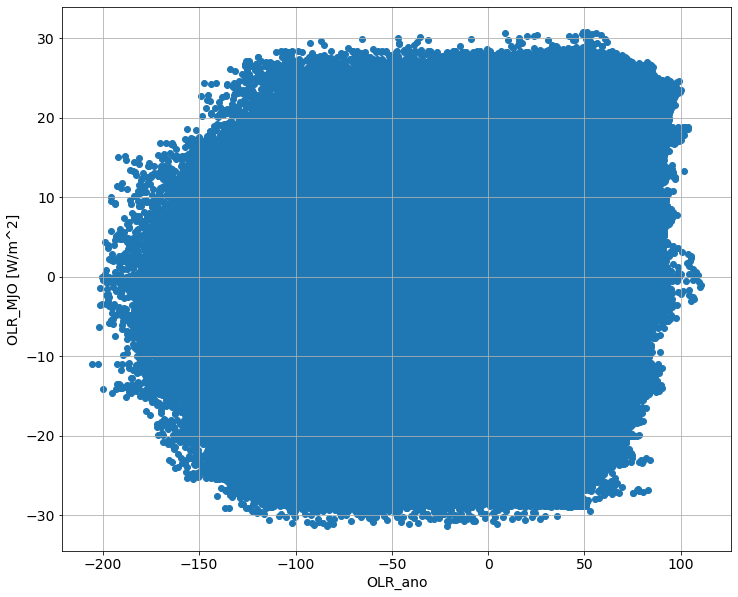

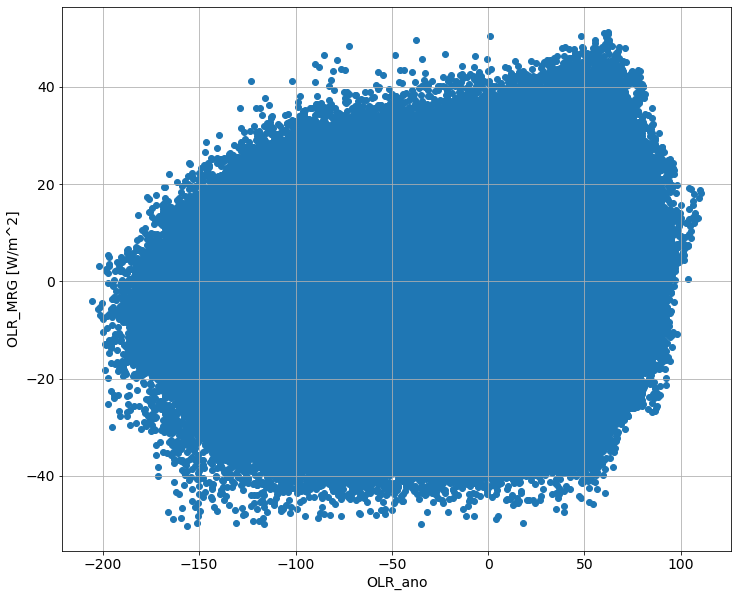

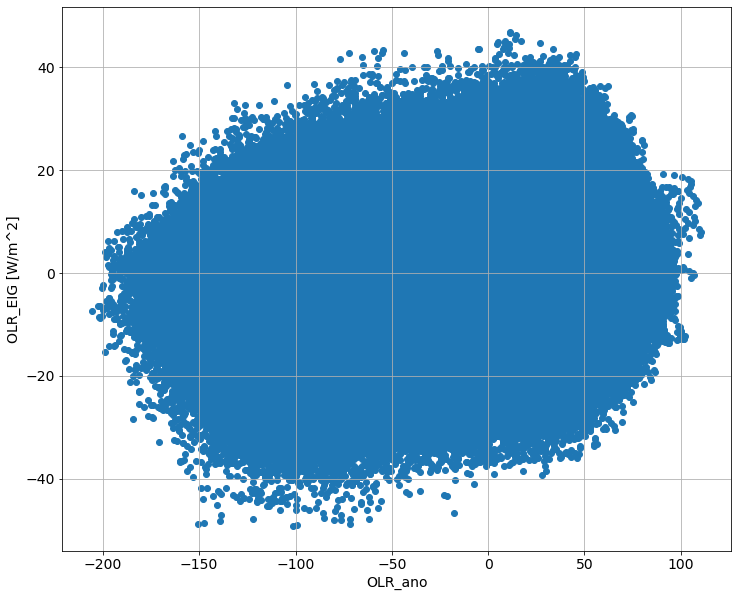

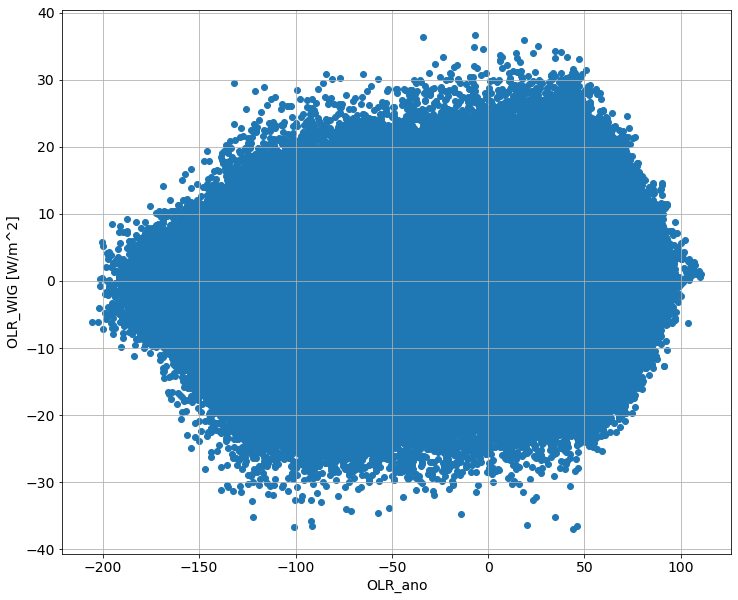

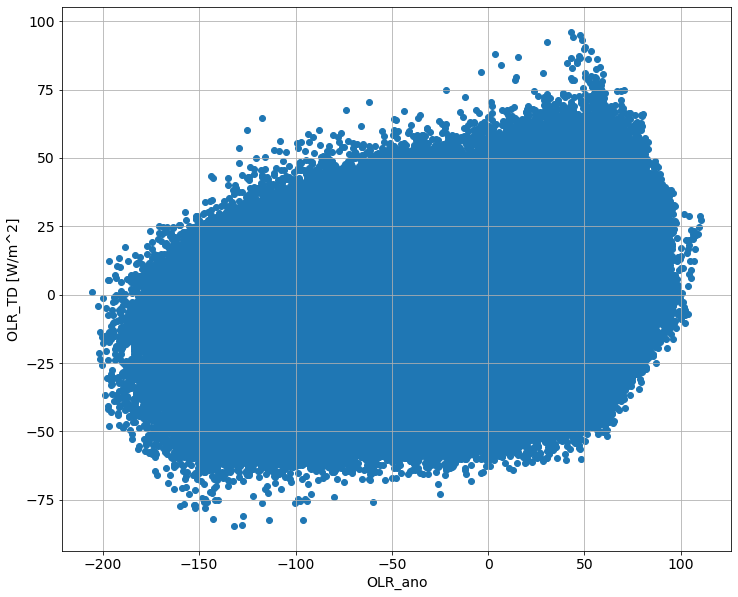

In [10]:
plt.rc("figure", figsize=(12,10))
for v in var :
    _ds_FILTER.plot.scatter(x = 'OLR_ano', y = v)
    plt.grid()
    plt.show()

In [16]:
_ds_FILTER = ds_FILTER.sel(lat = slice(4,10), lon = slice(180,220)).persist()

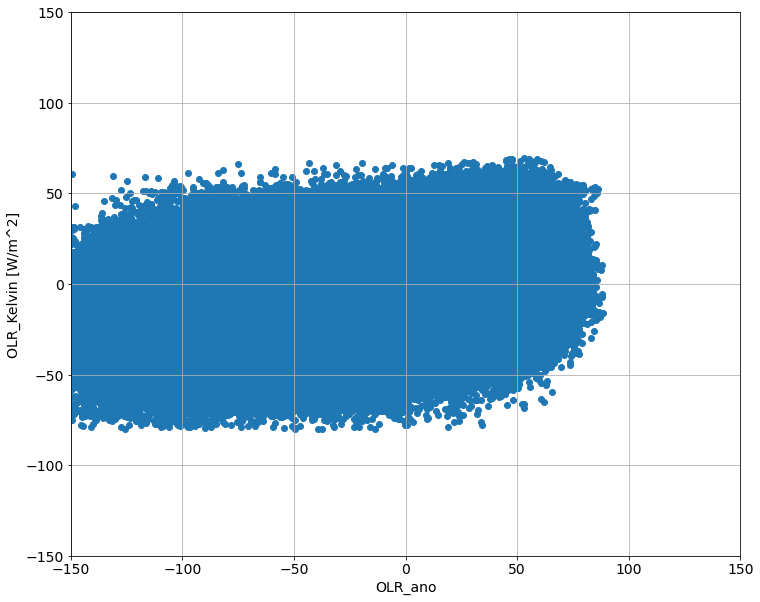

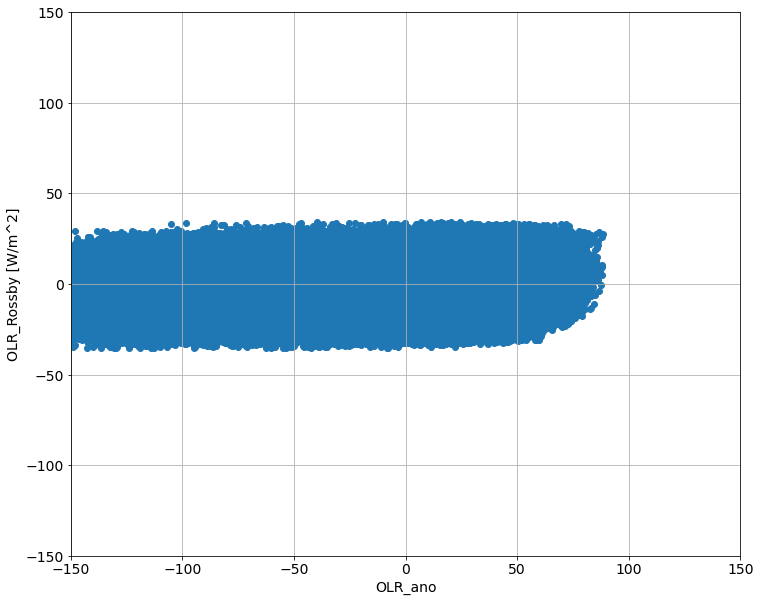

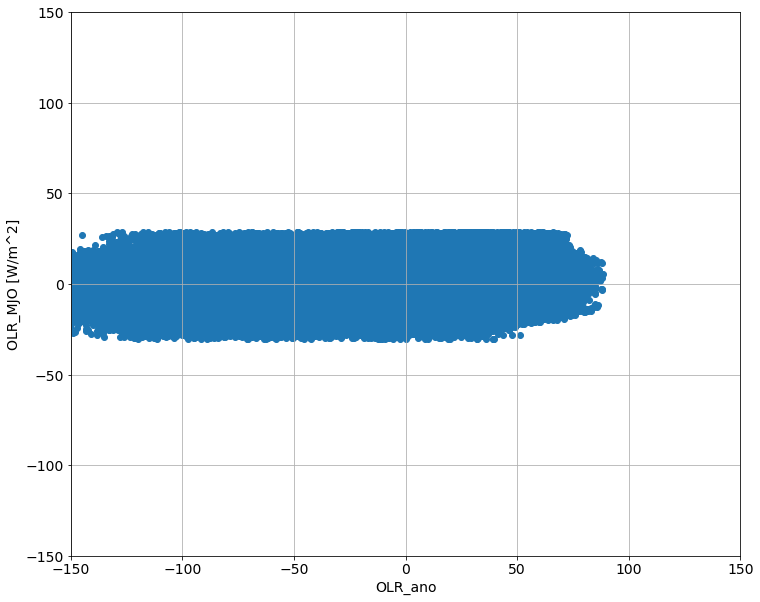

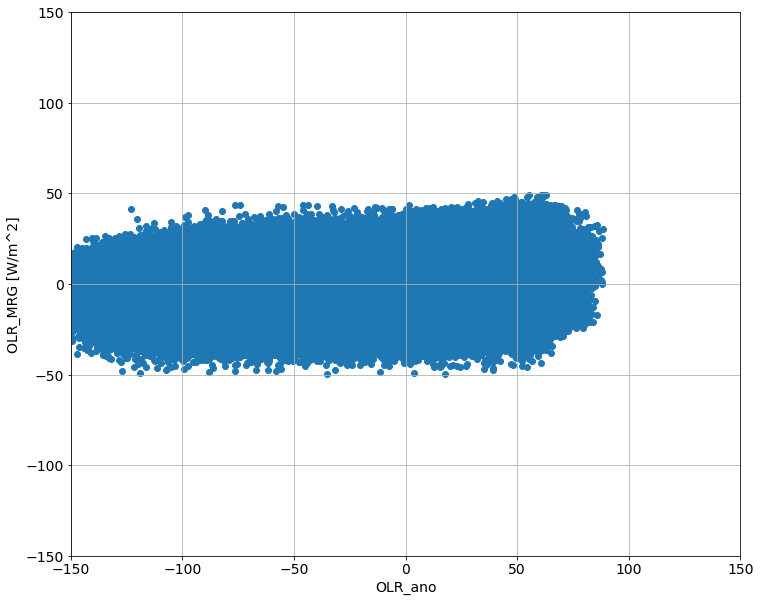

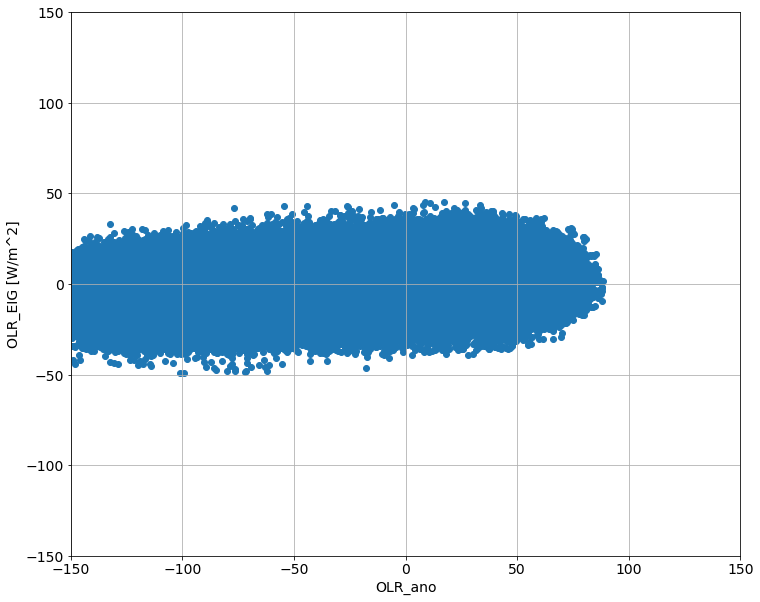

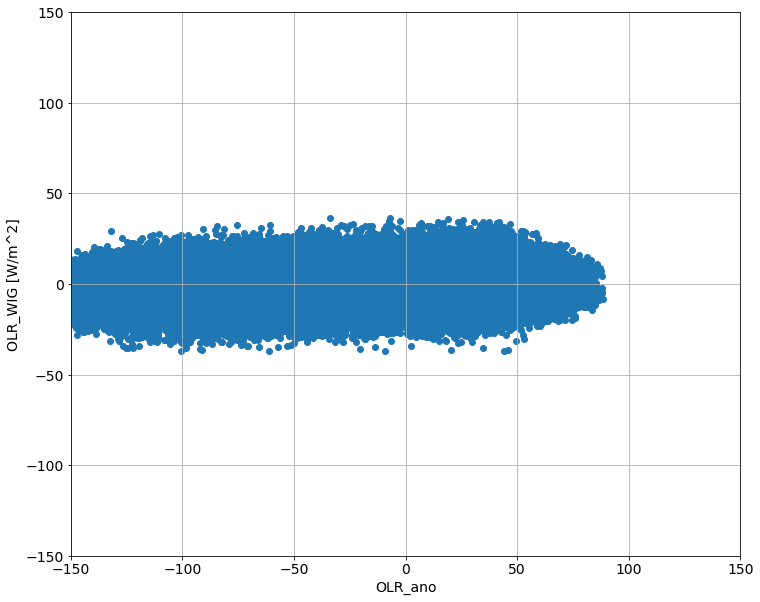

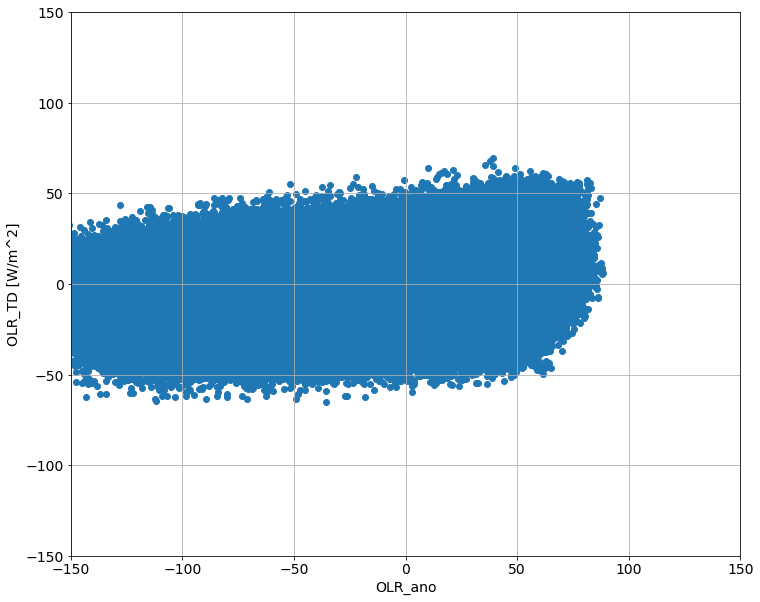

In [17]:
plt.rc("figure", figsize=(12,10))
for v in var :
    _ds_FILTER.plot.scatter(x = 'OLR_ano', y = v)
    plt.xlim([-150,150])
    plt.ylim([-150,150])

    plt.grid()
    plt.show()